# Semana 2: Propiedades y analisis Exploratorio

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

# Preprocesado y modelado
# ==============================================================================
import statsmodels.formula.api as smf
import scipy.stats as stats
import pylab
import statsmodels.api as sm


# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Carga de Datos
df = pd.read_csv('dataset/Tabla_pasantia.csv', sep=',', skiprows=1, names=['test', 'Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'])
df.head()

,test,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
0,Compresion,57,43,1.000000e+12,69.8,69.4,1.75,5.000000e+09,50.0,113.12,11.990
1,Compresion,57,43,1.000000e+12,69.8,69.4,1.75,5.000000e+08,50.0,112.01,11.280
2,Compresion,57,43,1.000000e+12,69.8,69.4,1.75,5.000000e+09,50.0,114.24,11.930
3,Compresion,57,43,1.000000e+12,69.8,69.4,1.75,5.000000e+10,50.0,114.23,13.560
4,Compresion,46,54,2.000000e+10,38.0,76.0,2.50,1.000000e+08,100.0,44.54,1.829


In [3]:
df.describe()

,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
count,123.000000,123.000000,1.230000e+02,123.000000,123.000000,123.000000,1.230000e+02,123.000000,123.000000,123.000000
mean,55.731707,44.268293,4.972927e+11,85.755610,57.706016,60.978374,6.327236e+08,148.781301,69.446337,3.347337
std,9.108700,9.108700,1.778146e+12,116.549688,79.328597,77.759327,4.536258e+09,132.104260,15.054142,1.893285
min,35.000000,35.000000,1.000000e+09,2.000000,2.000000,1.750000,1.000000e+07,0.100000,39.061758,1.078755
25%,50.000000,36.000000,1.000000e+10,27.500000,5.500000,5.500000,4.000000e+07,50.000000,60.142121,2.478769
50%,57.000000,43.000000,5.000000e+10,37.000000,16.000000,42.970000,1.000000e+08,50.000000,66.387591,2.932273
75%,64.000000,50.000000,1.000000e+11,74.300000,64.000000,75.000000,1.000000e+08,300.000000,76.458909,3.524915
max,65.000000,65.000000,1.000000e+13,404.000000,269.000000,269.000000,5.000000e+10,600.000000,114.661458,13.560000


## Se define df2 a la Tensión

In [4]:
df2 = df[df['test'] == "Tension"]
df2

,test,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
5,Tension,65,35,1.000000e+11,2.0,2.0,4.00,50000000.0,300.0,49.099000,2.519000
7,Tension,64,36,1.000000e+10,36.0,8.0,75.00,40000000.0,50.0,88.593000,4.645000
9,Tension,64,36,1.000000e+10,37.0,8.0,75.00,40000000.0,50.0,89.701166,4.624490
10,Tension,36,64,1.000000e+10,33.0,8.0,65.00,40000000.0,50.0,71.872943,3.044898
11,Tension,50,50,1.000000e+09,99.1,49.5,6.23,40000000.0,50.0,57.743606,2.083145
...,...,...,...,...,...,...,...,...,...,...,...
114,Tension,50,50,1.000000e+10,196.0,130.0,65.00,50000000.0,300.0,50.071160,2.078454
115,Tension,64,36,1.000000e+10,190.0,126.0,63.00,50000000.0,300.0,66.241851,2.631566
116,Tension,36,64,1.000000e+10,202.0,134.0,67.00,100000000.0,100.0,57.286443,2.721617
117,Tension,50,50,1.000000e+10,196.0,130.0,65.00,100000000.0,100.0,60.989847,2.656140


In [5]:
df2.describe()

,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
count,64.000000,64.000000,6.400000e+01,64.000000,64.000000,64.000000,6.400000e+01,64.000000,64.000000,64.000000
mean,55.187500,44.812500,1.138438e+11,84.042187,57.998438,58.895625,1.777344e+08,141.093750,70.123716,3.261186
std,9.367073,9.367073,2.632622e+11,103.310260,70.764392,69.917615,2.971915e+08,138.519578,13.666862,0.972607
min,35.000000,35.000000,1.000000e+09,2.000000,2.000000,4.000000,1.000000e+07,50.000000,39.061758,1.401135
25%,50.000000,36.000000,1.000000e+10,30.000000,8.000000,5.000000,4.000000e+07,50.000000,58.916059,2.649996
50%,50.000000,50.000000,1.000000e+10,37.000000,29.550000,54.400000,8.300000e+07,50.000000,71.355260,3.257520
75%,64.000000,50.000000,1.000000e+11,78.800000,60.000000,75.000000,1.000000e+08,300.000000,81.408848,3.596953
max,65.000000,65.000000,1.000000e+12,404.000000,269.000000,269.000000,1.000000e+09,600.000000,114.661458,5.887500


## Busqueda Datos Atipicos en df2

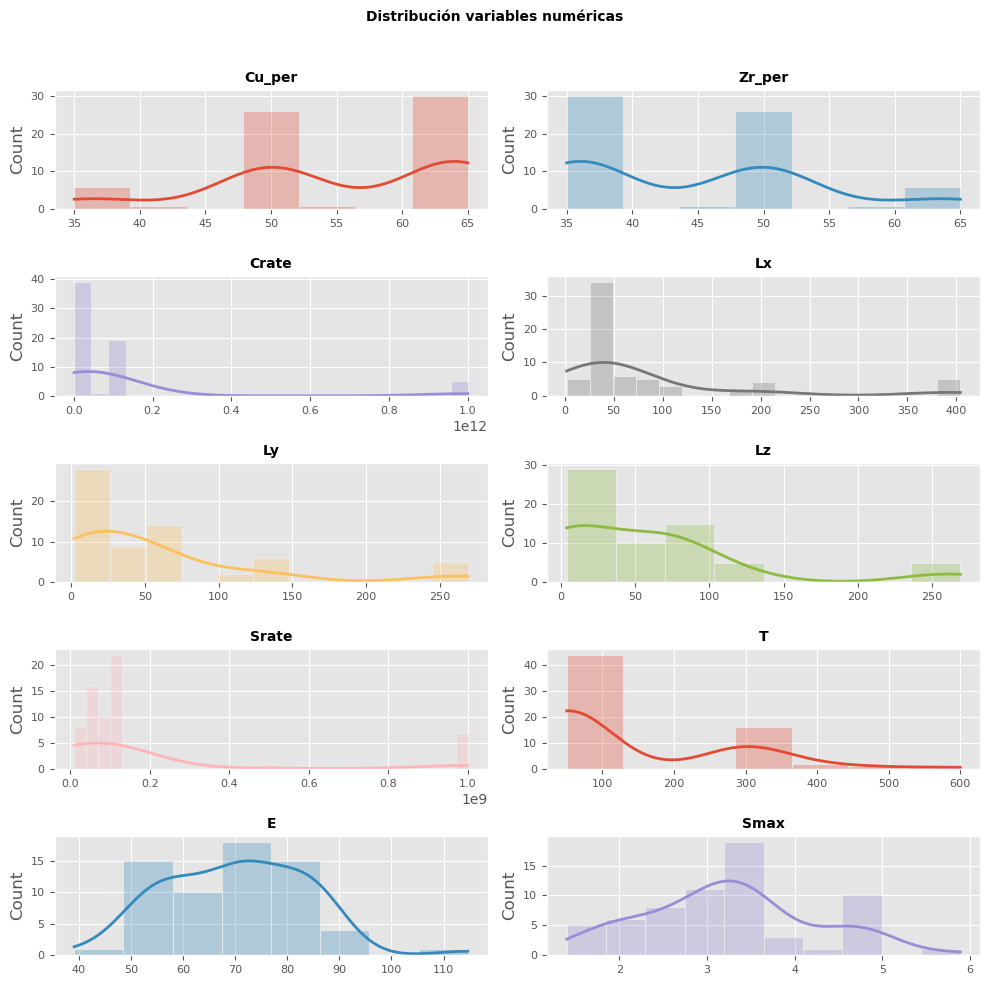

In [6]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 10)) # Numero columnas y filas en caso en caso que haya mas variables
axes = axes.flat
columnas_numeric = df2.select_dtypes(include=['float64', 'int64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df2,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

### BoxPlot

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffb9f807610>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffb9f807bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffb9f807340>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffb9faf8070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffb9faf8340>],
 'means': []}

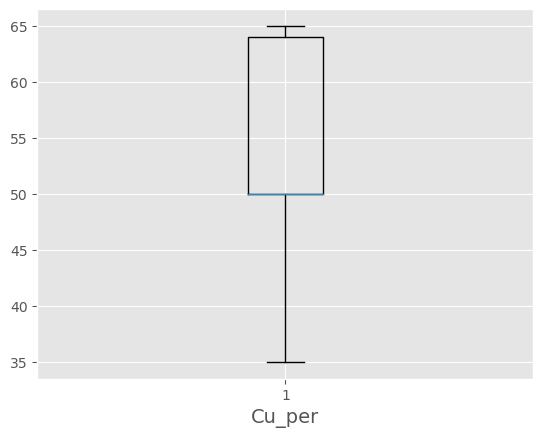

In [7]:
#Cu_per
plt.xlabel('Cu_per', fontsize=14)
plt.boxplot(df2['Cu_per'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffb9fb321d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffb9fb32770>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffb9fb31f00>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffb9fb32d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffb9fb32fe0>],
 'means': []}

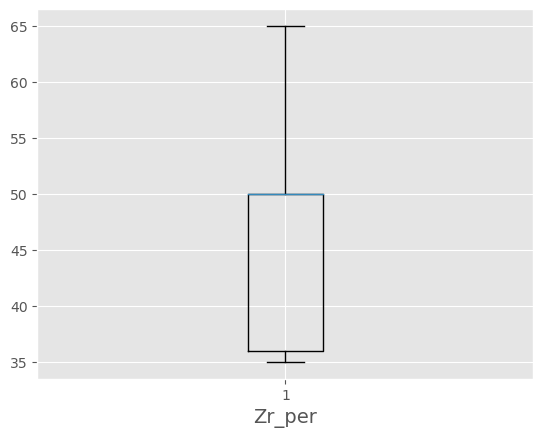

In [8]:
#Zr_per
plt.xlabel('Zr_per', fontsize=14)
plt.boxplot(df2['Zr_per'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7ffb9fba4b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffb9fba50c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffb9fba4850>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffb9fba5660>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffb9fba5930>],
 'means': []}

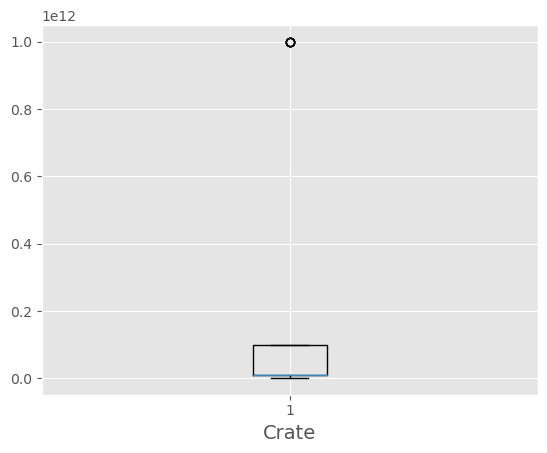

In [9]:
#Crate
plt.xlabel('Crate', fontsize=14)
plt.boxplot(df2['Crate'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffb9fa033a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffb9fa03940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffb9fa030a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffb9fa03ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffb9fa341f0>],
 'means': []}

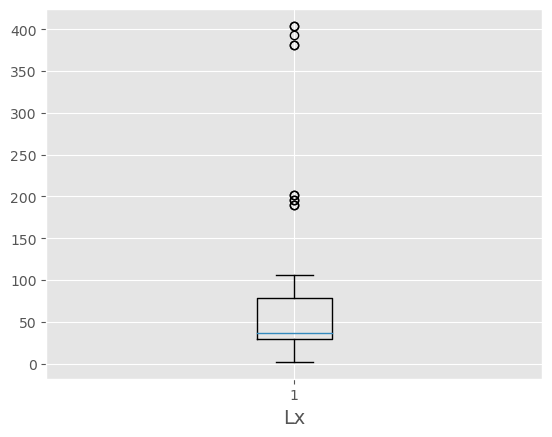

In [10]:
#Lx
plt.xlabel('Lx', fontsize=14)
plt.boxplot(df2['Lx'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffb9fa72d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffb9fa732b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffb9fa72a40>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffb9fa73850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffb9fa73b20>],
 'means': []}

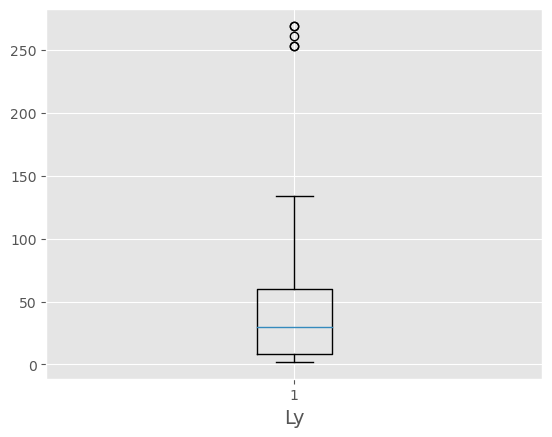

In [11]:
#Ly
plt.xlabel('Ly', fontsize=14)
plt.boxplot(df2['Ly'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffb9faed0c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffb9faed660>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffb9faecbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffb9faedc00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffb9faeded0>],
 'means': []}

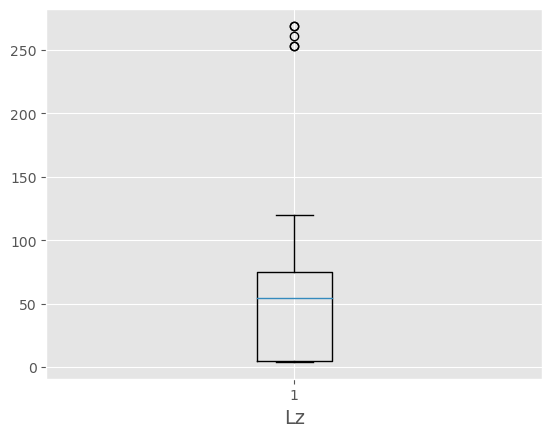

In [12]:
#Lz
plt.xlabel('Lz', fontsize=14)
plt.boxplot(df2['Lz'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffb9f93f5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffb9f93fb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffb9f93f3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffb9f974130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffb9f974400>],
 'means': []}

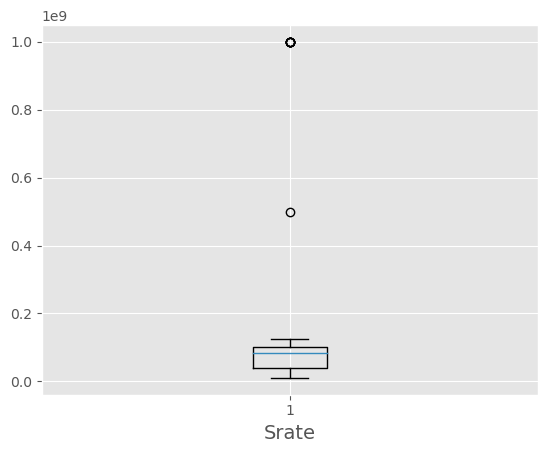

In [13]:
#Srate
plt.xlabel('Srate', fontsize=14)
plt.boxplot(df2['Srate'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffb9f9b5a20>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffb9f9b5ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffb9f9b5750>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffb9f9b6470>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffb9f9b6740>],
 'means': []}

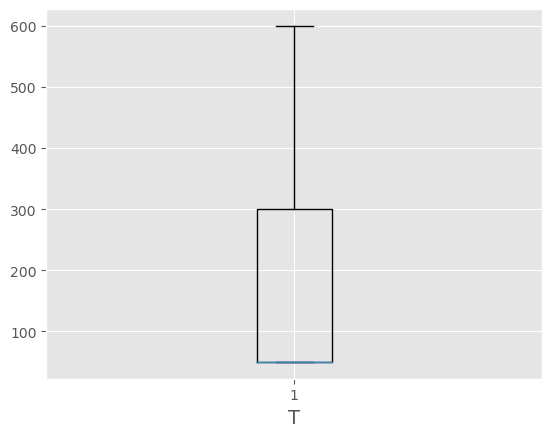

In [14]:
#T
plt.xlabel('T', fontsize=14)
plt.boxplot(df2['T'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffb9da7ffd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffb9dab05b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffb9da7fd60>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffb9dab0b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffb9dab0e20>],
 'means': []}

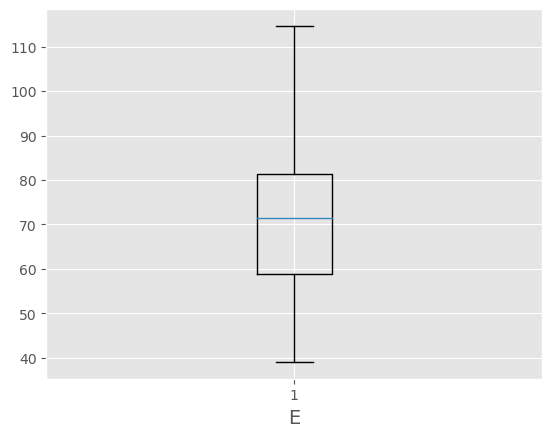

In [15]:
#E
plt.xlabel('E', fontsize=14)
plt.boxplot(df2['E'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffb9daeeef0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffb9daef490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffb9daeeb00>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffb9daefa30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffb9daefd00>],
 'means': []}

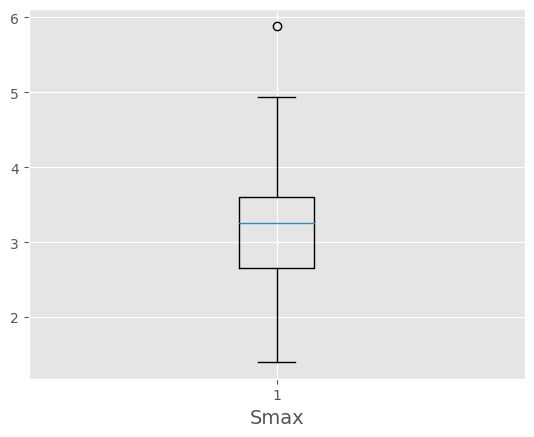

In [16]:
#Smax
plt.xlabel('Smax', fontsize=14)
plt.boxplot(df2['Smax'])

## Identificación de Outliers

Con respecto al Uso de Boxplot , se esitma que hay presencia de Ouliers en las Variables:
- Smax
- Srate
- Lz
- Ly
- Lx
- Crate


In [17]:
df2 = df2.sort_values('Smax')
df2

,test,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
36,Tension,64,36,1.000000e+10,40.0,5.0,120.0,1.000000e+07,600.0,49.928741,1.401135
70,Tension,35,65,1.000000e+11,78.8,23.2,4.3,1.000000e+07,300.0,57.354863,1.673730
68,Tension,56,44,1.000000e+11,78.8,23.2,4.3,1.000000e+07,300.0,52.742947,1.728144
69,Tension,50,50,1.000000e+11,78.8,23.2,4.3,1.000000e+07,300.0,51.392629,1.784416
111,Tension,36,64,1.000000e+10,404.0,269.0,269.0,1.000000e+08,400.0,52.549724,1.843817
...,...,...,...,...,...,...,...,...,...,...,...
22,Tension,64,36,1.000000e+10,37.0,8.0,75.0,1.000000e+08,50.0,86.308234,4.775493
18,Tension,64,36,1.000000e+10,37.0,8.0,75.0,1.000000e+09,50.0,83.411387,4.841119
21,Tension,64,36,1.000000e+10,37.0,8.0,75.0,1.000000e+09,50.0,85.185610,4.904421
84,Tension,64,36,1.000000e+10,80.0,40.0,5.4,4.000000e+07,50.0,82.789474,4.940299


Un vaor de 5.88 en ID 98

In [18]:
df2 = df2.sort_values('Srate')
df2

,test,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
36,Tension,64,36,1.000000e+10,40.0,5.0,120.00,1.000000e+07,600.0,49.928741,1.401135
70,Tension,35,65,1.000000e+11,78.8,23.2,4.30,1.000000e+07,300.0,57.354863,1.673730
68,Tension,56,44,1.000000e+11,78.8,23.2,4.30,1.000000e+07,300.0,52.742947,1.728144
69,Tension,50,50,1.000000e+11,78.8,23.2,4.30,1.000000e+07,300.0,51.392629,1.784416
35,Tension,64,36,1.000000e+10,40.0,5.0,120.00,1.000000e+07,480.0,39.061758,1.881235
...,...,...,...,...,...,...,...,...,...,...,...
58,Tension,50,50,1.000000e+09,56.2,28.0,6.20,1.000000e+09,50.0,67.263825,3.451853
33,Tension,50,50,1.000000e+09,56.2,28.0,6.23,1.000000e+09,50.0,53.636364,3.441704
18,Tension,64,36,1.000000e+10,37.0,8.0,75.00,1.000000e+09,50.0,83.411387,4.841119
21,Tension,64,36,1.000000e+10,37.0,8.0,75.00,1.000000e+09,50.0,85.185610,4.904421


In [19]:
df2 = df2.sort_values('Lz')
df2

,test,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
5,Tension,65,35,1.000000e+11,2.0,2.0,4.0,50000000.0,300.0,49.099000,2.519000
98,Tension,64,36,1.000000e+10,32.0,64.0,4.0,100000000.0,50.0,114.661458,5.887500
70,Tension,35,65,1.000000e+11,78.8,23.2,4.3,10000000.0,300.0,57.354863,1.673730
68,Tension,56,44,1.000000e+11,78.8,23.2,4.3,10000000.0,300.0,52.742947,1.728144
69,Tension,50,50,1.000000e+11,78.8,23.2,4.3,10000000.0,300.0,51.392629,1.784416
...,...,...,...,...,...,...,...,...,...,...,...
112,Tension,64,36,1.000000e+10,381.0,253.0,253.0,100000000.0,400.0,61.864640,2.345966
108,Tension,64,36,1.000000e+10,381.0,253.0,253.0,100000000.0,50.0,72.374766,3.414837
107,Tension,50,50,1.000000e+10,393.0,261.0,261.0,100000000.0,50.0,61.661303,2.814495
111,Tension,36,64,1.000000e+10,404.0,269.0,269.0,100000000.0,400.0,52.549724,1.843817


In [20]:
df2 = df2.sort_values('Ly')
df2

,test,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
5,Tension,65,35,1.000000e+11,2.0,2.0,4.0,50000000.0,300.0,49.099000,2.519000
61,Tension,50,50,1.000000e+12,27.5,2.0,45.8,125000000.0,50.0,85.557143,3.549301
60,Tension,50,50,1.000000e+12,18.3,2.0,45.8,125000000.0,50.0,75.591036,3.596535
59,Tension,50,50,1.000000e+12,2.5,2.0,45.8,125000000.0,50.0,56.491097,3.544303
35,Tension,64,36,1.000000e+10,40.0,5.0,120.0,10000000.0,480.0,39.061758,1.881235
...,...,...,...,...,...,...,...,...,...,...,...
112,Tension,64,36,1.000000e+10,381.0,253.0,253.0,100000000.0,400.0,61.864640,2.345966
108,Tension,64,36,1.000000e+10,381.0,253.0,253.0,100000000.0,50.0,72.374766,3.414837
107,Tension,50,50,1.000000e+10,393.0,261.0,261.0,100000000.0,50.0,61.661303,2.814495
111,Tension,36,64,1.000000e+10,404.0,269.0,269.0,100000000.0,400.0,52.549724,1.843817


In [21]:
df2 = df2.sort_values('Lx')
df2

,test,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
5,Tension,65,35,1.000000e+11,2.0,2.0,4.0,50000000.0,300.0,49.099000,2.519000
59,Tension,50,50,1.000000e+12,2.5,2.0,45.8,125000000.0,50.0,56.491097,3.544303
85,Tension,64,36,1.000000e+10,5.0,55.0,110.0,40000000.0,50.0,62.900209,2.897010
86,Tension,64,36,1.000000e+12,5.0,55.0,110.0,40000000.0,50.0,59.306877,2.438538
60,Tension,50,50,1.000000e+12,18.3,2.0,45.8,125000000.0,50.0,75.591036,3.596535
...,...,...,...,...,...,...,...,...,...,...,...
112,Tension,64,36,1.000000e+10,381.0,253.0,253.0,100000000.0,400.0,61.864640,2.345966
108,Tension,64,36,1.000000e+10,381.0,253.0,253.0,100000000.0,50.0,72.374766,3.414837
107,Tension,50,50,1.000000e+10,393.0,261.0,261.0,100000000.0,50.0,61.661303,2.814495
111,Tension,36,64,1.000000e+10,404.0,269.0,269.0,100000000.0,400.0,52.549724,1.843817


In [22]:
# Tanto en X,Y, Z hay presencia de datos que son más grande lo usual. Siento el ID de estos #100,103,106,107,111

In [23]:
df2 = df2.sort_values('Crate')
df2

,test,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
73,Tension,50,50,1.000000e+09,49.6,99.2,6.20,1.000000e+08,300.0,57.309686,2.435079
64,Tension,50,50,1.000000e+09,56.2,28.0,6.23,1.000000e+09,50.0,69.193548,3.483871
32,Tension,50,50,1.000000e+09,100.0,50.0,6.23,1.000000e+08,50.0,62.784684,3.092732
11,Tension,50,50,1.000000e+09,99.1,49.5,6.23,4.000000e+07,50.0,57.743606,2.083145
33,Tension,50,50,1.000000e+09,56.2,28.0,6.23,1.000000e+09,50.0,53.636364,3.441704
...,...,...,...,...,...,...,...,...,...,...,...
61,Tension,50,50,1.000000e+12,27.5,2.0,45.80,1.250000e+08,50.0,85.557143,3.549301
60,Tension,50,50,1.000000e+12,18.3,2.0,45.80,1.250000e+08,50.0,75.591036,3.596535
86,Tension,64,36,1.000000e+12,5.0,55.0,110.00,4.000000e+07,50.0,59.306877,2.438538
72,Tension,64,36,1.000000e+12,38.5,5.5,77.00,2.000000e+07,50.0,68.629590,2.782266


In [24]:
# Las Columnas de ID 59 son considerablemente más grandes.

In [25]:
# Se formulará un nuevo DataFrame sin estos datos.

df_WO = df2.drop([59,106,107,111])
df_WO

,test,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
73,Tension,50,50,1.000000e+09,49.6,99.2,6.20,1.000000e+08,300.0,57.309686,2.435079
64,Tension,50,50,1.000000e+09,56.2,28.0,6.23,1.000000e+09,50.0,69.193548,3.483871
32,Tension,50,50,1.000000e+09,100.0,50.0,6.23,1.000000e+08,50.0,62.784684,3.092732
11,Tension,50,50,1.000000e+09,99.1,49.5,6.23,4.000000e+07,50.0,57.743606,2.083145
33,Tension,50,50,1.000000e+09,56.2,28.0,6.23,1.000000e+09,50.0,53.636364,3.441704
58,Tension,50,50,1.000000e+09,56.2,28.0,6.20,1.000000e+09,50.0,67.263825,3.451853
18,Tension,64,36,1.000000e+10,37.0,8.0,75.00,1.000000e+09,50.0,83.411387,4.841119
20,Tension,64,36,1.000000e+10,37.0,8.0,75.00,4.000000e+07,50.0,82.575758,4.648904
9,Tension,64,36,1.000000e+10,37.0,8.0,75.00,4.000000e+07,50.0,89.701166,4.624490
23,Tension,64,36,1.000000e+10,37.0,8.0,75.00,4.000000e+07,50.0,83.876354,4.717331


# Comprobación Posterior a Primer Filtrado

In [26]:
# Se Utilizará el grafico Quantil-Quantil

In [27]:
list(df_WO)

['test',
 'Cu_per',
 'Zr_per',
 'Crate',
 'Lx',
 'Ly',
 'Lz',
 'Srate',
 'T',
 'E',
 'Smax']

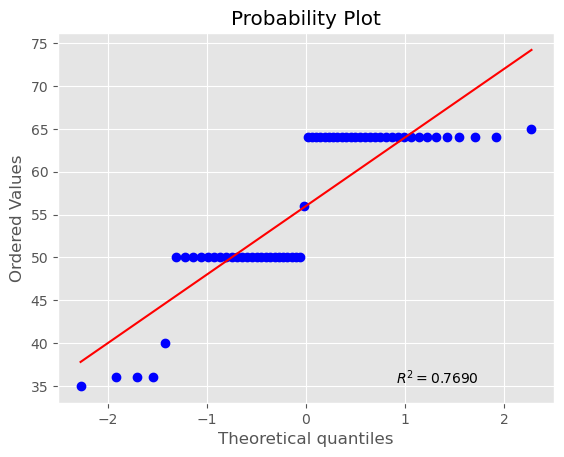

In [28]:
stats.probplot(df_WO['Cu_per'], dist="norm",plot=pylab , rvalue = True)
pylab.show()

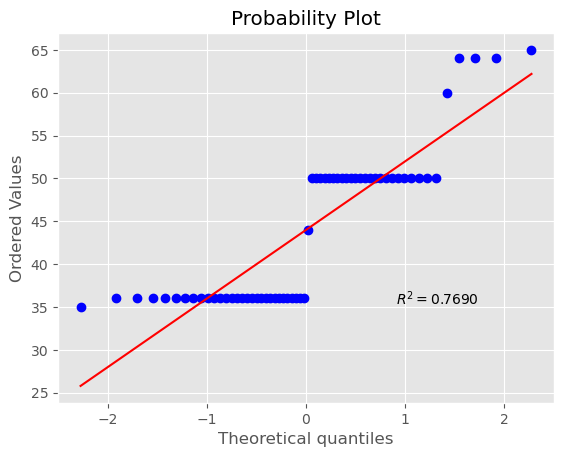

In [29]:
stats.probplot(df_WO['Zr_per'], dist="norm",plot=pylab , rvalue = True)
pylab.show()

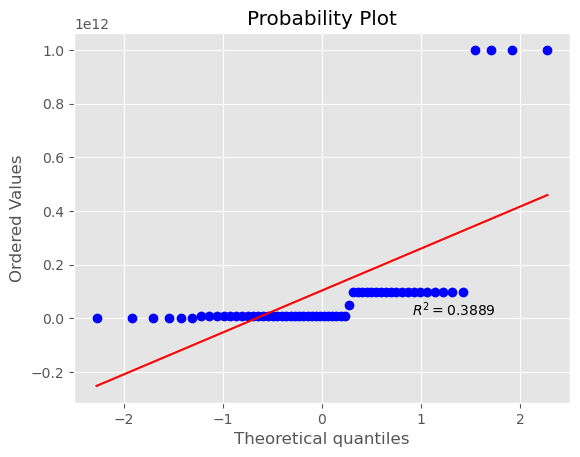

In [30]:
stats.probplot(df_WO['Crate'], dist="norm",plot=pylab , rvalue = True)
pylab.show()

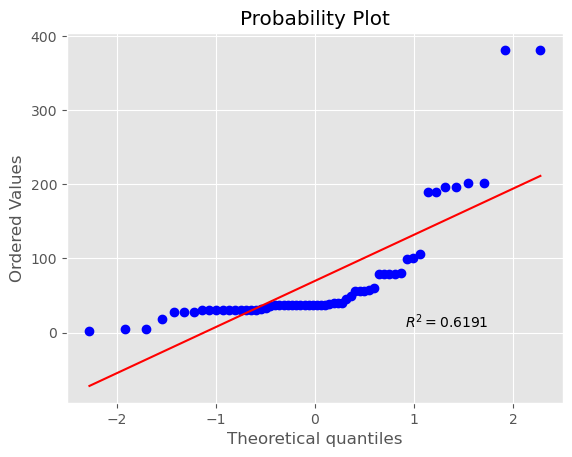

In [31]:
stats.probplot(df_WO['Lx'], dist="norm",plot=pylab , rvalue = True)
pylab.show()

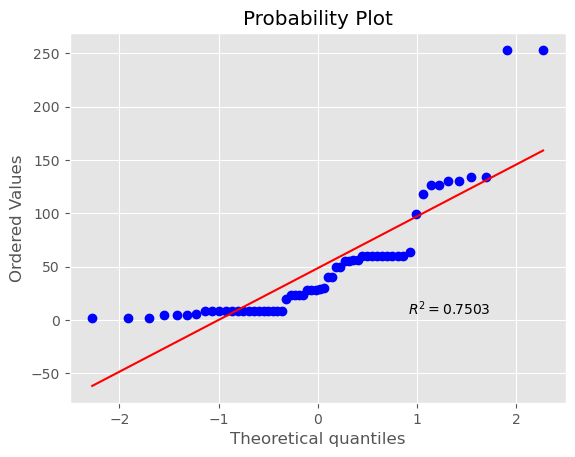

In [32]:
stats.probplot(df_WO['Ly'], dist="norm",plot=pylab , rvalue = True)
pylab.show()

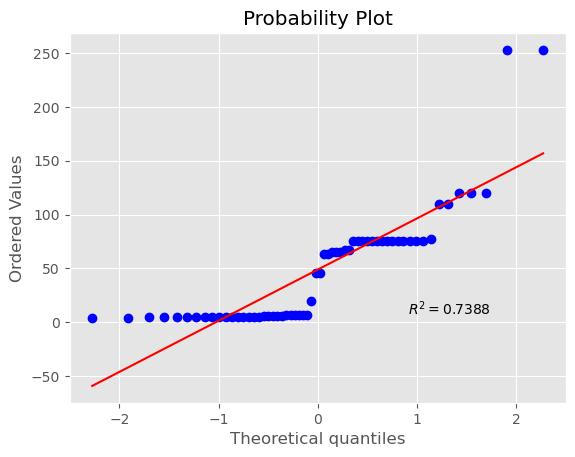

In [33]:
stats.probplot(df_WO['Lz'], dist="norm",plot=pylab , rvalue = True)
pylab.show()

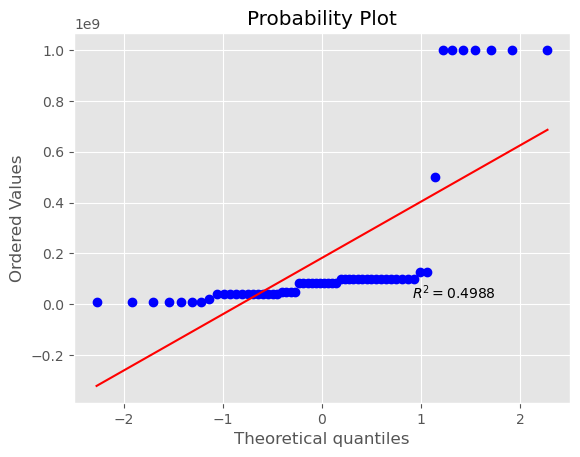

In [34]:
stats.probplot(df_WO['Srate'], dist="norm",plot=pylab , rvalue = True)
pylab.show()

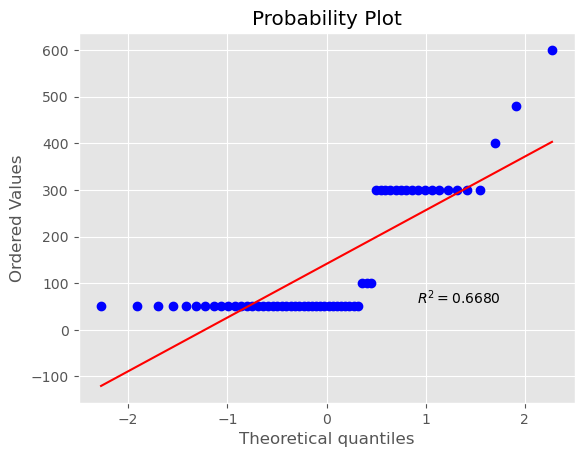

In [35]:
stats.probplot(df_WO['T'], dist="norm",plot=pylab , rvalue = True)
pylab.show()

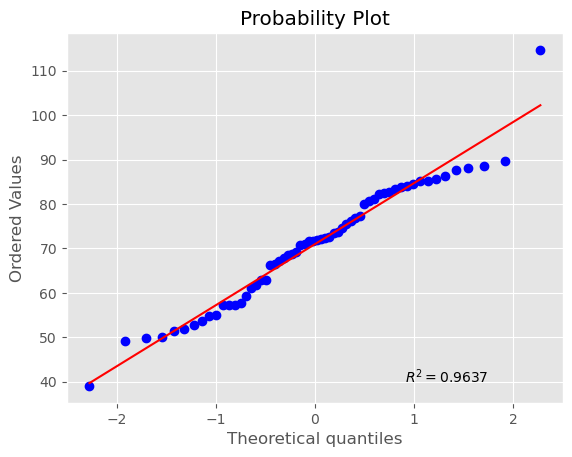

In [36]:
stats.probplot(df_WO['E'], dist="norm",plot=pylab , rvalue = True)
pylab.show()

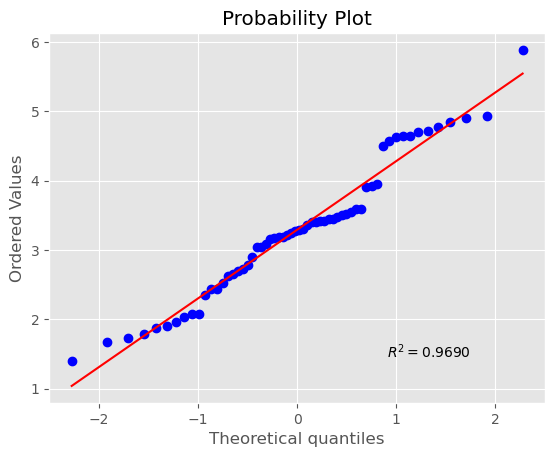

In [37]:
stats.probplot(df_WO['Smax'], dist="norm",plot=pylab , rvalue = True)
pylab.show()

In [38]:
# Debido a que Srate tiene un ajuste bajo, se buscarán sus valores atipicos

In [39]:
df_WO = df_WO.sort_values('Crate')
df_WO

,test,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
73,Tension,50,50,1.000000e+09,49.6,99.2,6.20,1.000000e+08,300.0,57.309686,2.435079
64,Tension,50,50,1.000000e+09,56.2,28.0,6.23,1.000000e+09,50.0,69.193548,3.483871
32,Tension,50,50,1.000000e+09,100.0,50.0,6.23,1.000000e+08,50.0,62.784684,3.092732
11,Tension,50,50,1.000000e+09,99.1,49.5,6.23,4.000000e+07,50.0,57.743606,2.083145
33,Tension,50,50,1.000000e+09,56.2,28.0,6.23,1.000000e+09,50.0,53.636364,3.441704
58,Tension,50,50,1.000000e+09,56.2,28.0,6.20,1.000000e+09,50.0,67.263825,3.451853
15,Tension,64,36,1.000000e+10,37.0,8.0,75.00,1.000000e+09,300.0,76.789929,3.951220
12,Tension,64,36,1.000000e+10,37.0,8.0,75.00,1.000000e+09,300.0,68.713663,3.930818
21,Tension,64,36,1.000000e+10,37.0,8.0,75.00,1.000000e+09,50.0,85.185610,4.904421
22,Tension,64,36,1.000000e+10,37.0,8.0,75.00,1.000000e+08,50.0,86.308234,4.775493


In [40]:
df_WO2 = df_WO.drop([61,60,86,72])
df_WO2

,test,Cu_per,Zr_per,Crate,Lx,Ly,Lz,Srate,T,E,Smax
73,Tension,50,50,1.000000e+09,49.6,99.2,6.20,1.000000e+08,300.0,57.309686,2.435079
64,Tension,50,50,1.000000e+09,56.2,28.0,6.23,1.000000e+09,50.0,69.193548,3.483871
32,Tension,50,50,1.000000e+09,100.0,50.0,6.23,1.000000e+08,50.0,62.784684,3.092732
11,Tension,50,50,1.000000e+09,99.1,49.5,6.23,4.000000e+07,50.0,57.743606,2.083145
33,Tension,50,50,1.000000e+09,56.2,28.0,6.23,1.000000e+09,50.0,53.636364,3.441704
58,Tension,50,50,1.000000e+09,56.2,28.0,6.20,1.000000e+09,50.0,67.263825,3.451853
15,Tension,64,36,1.000000e+10,37.0,8.0,75.00,1.000000e+09,300.0,76.789929,3.951220
12,Tension,64,36,1.000000e+10,37.0,8.0,75.00,1.000000e+09,300.0,68.713663,3.930818
21,Tension,64,36,1.000000e+10,37.0,8.0,75.00,1.000000e+09,50.0,85.185610,4.904421
22,Tension,64,36,1.000000e+10,37.0,8.0,75.00,1.000000e+08,50.0,86.308234,4.775493


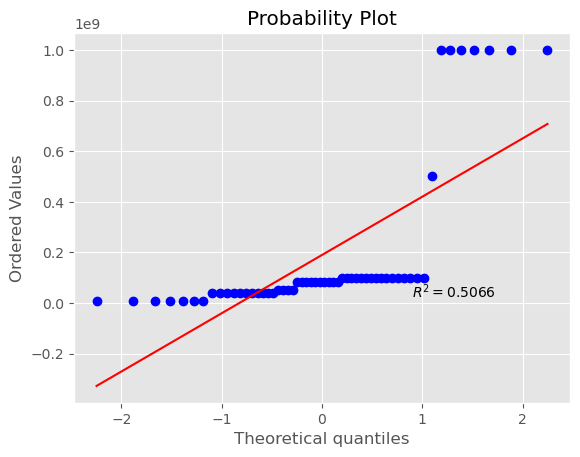

In [41]:
stats.probplot(df_WO2['Srate'], dist="norm",plot=pylab , rvalue = True)
pylab.show()

In [42]:
# Ahora que los datos están algo filtrados, se estudiará la relación entre estos.

## Relaciones

Correlacion

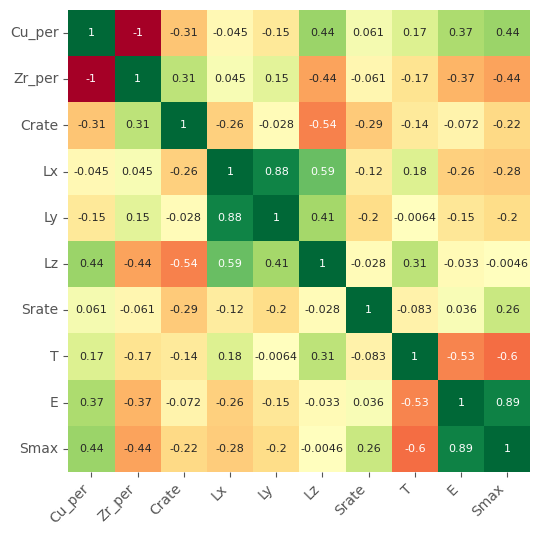

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

sns.heatmap(
    df_WO2.corr(),
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = "RdYlGn",
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

Estudio del VIF

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
exog = sm.add_constant(df_WO2[df_WO2.columns[1:11]])
rango = sm.add_constant(df_WO2[df_WO2.columns[1:11]]).shape[1]
for i in range(rango):
    vif.append(variance_inflation_factor(exog.values, i))
pd.DataFrame({'VIF': vif[1:]}, index= df_WO2.columns[1:11])

,VIF
Cu_per,1.093372e+11
Zr_per,1.699792e+12
Crate,2.092732e+00
Lx,8.124517e+00
Ly,6.618438e+00
Lz,2.793555e+00
Srate,1.479437e+00
T,2.899545e+00
E,6.498679e+00
Smax,1.122446e+01


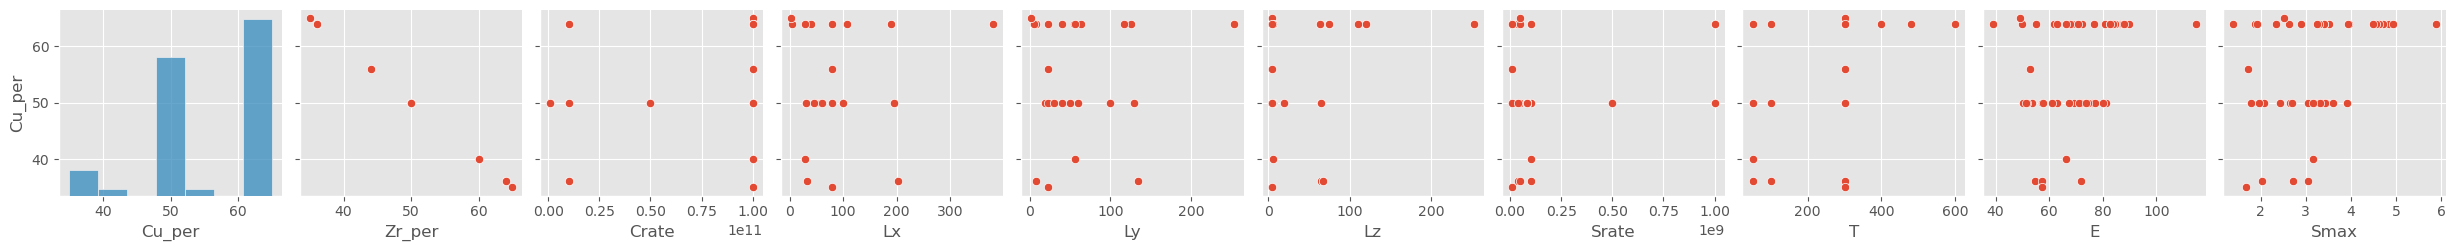

In [45]:
sns.pairplot(data=df_WO2, x_vars=['Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'], y_vars=['Cu_per'])


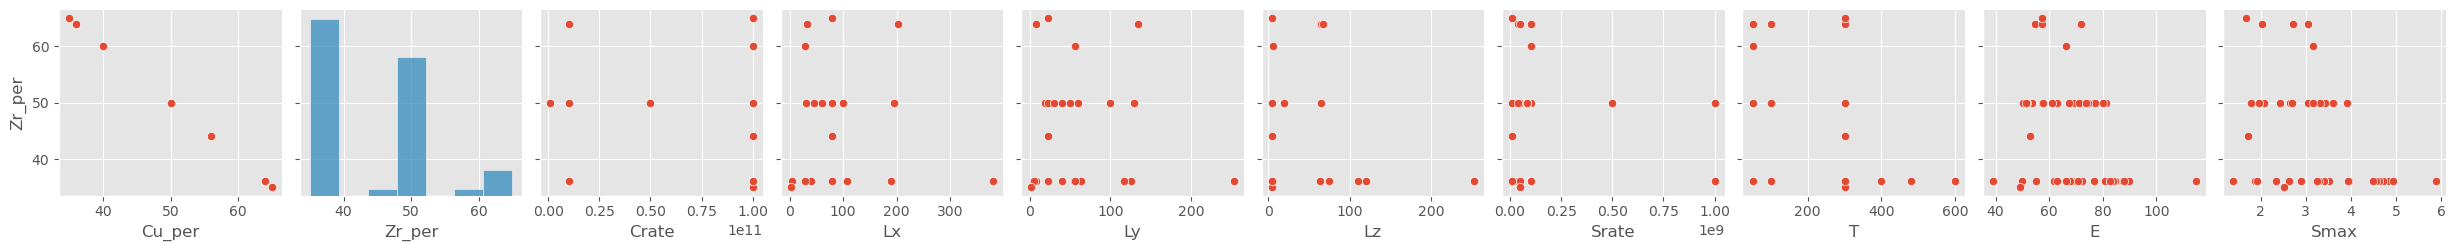

In [46]:
sns.pairplot(data=df_WO2, x_vars=['Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'], y_vars=['Zr_per'])


relacion inversamente proporcional entre los percentiles.

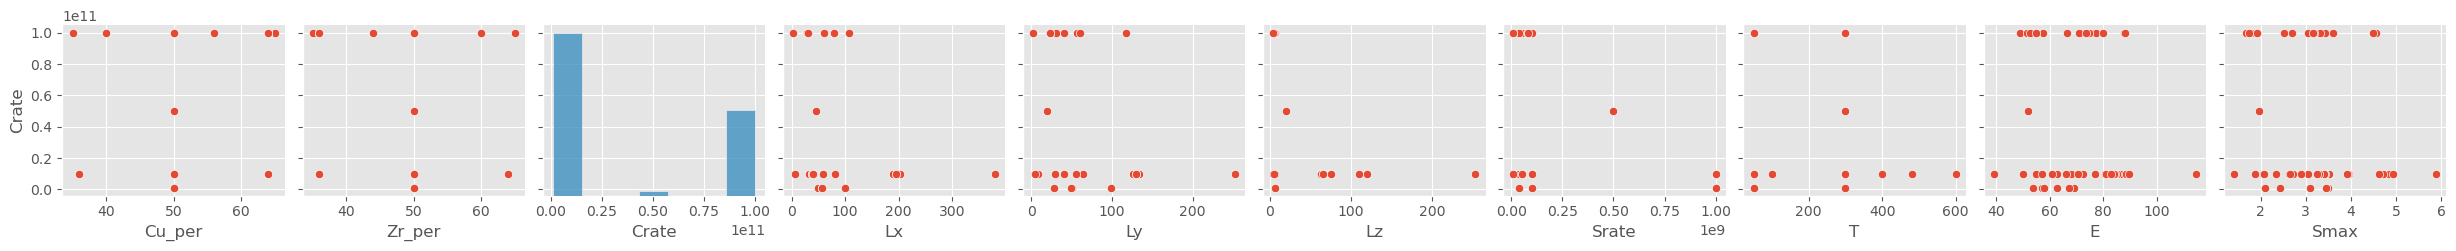

In [47]:
sns.pairplot(data=df_WO2, x_vars=['Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'], y_vars=['Crate'])


No se ve un patron claro

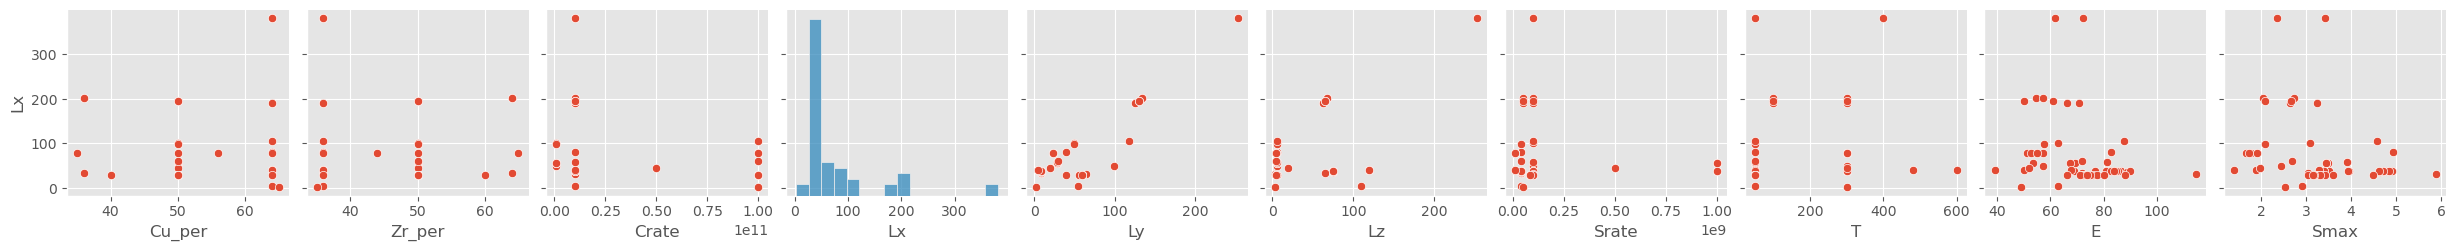

In [48]:
sns.pairplot(data=df_WO2, x_vars=['Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'], y_vars=['Lx'])


In [49]:
# LX es directamente proporcional con Ly, tiene una pequeña tendencia a parecerse a LZ

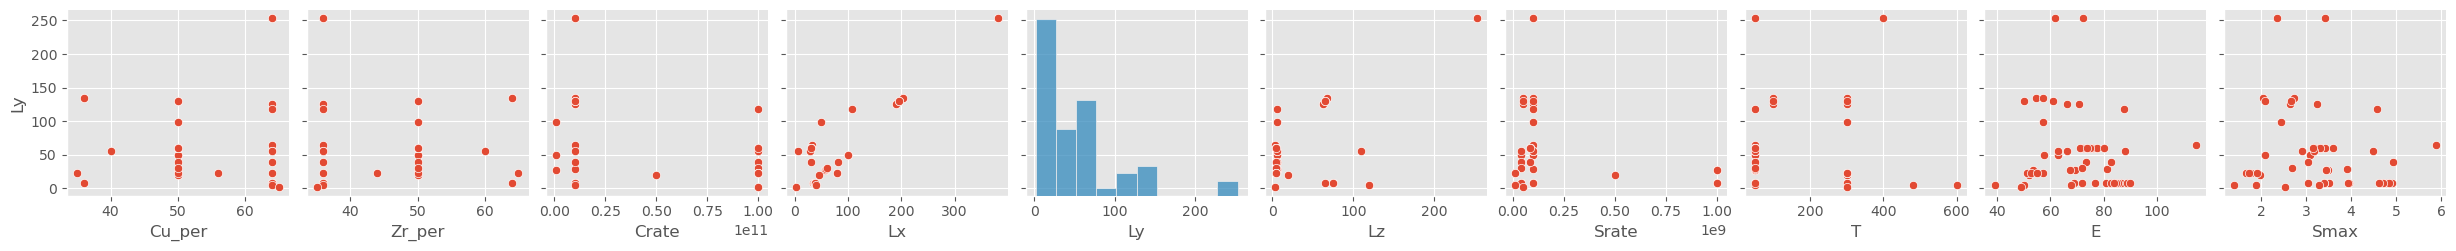

In [50]:
sns.pairplot(data=df_WO2, x_vars=['Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'], y_vars=['Ly'])


In [51]:
# Ly es directamente proporiconal a Lx, con un aire en LZ

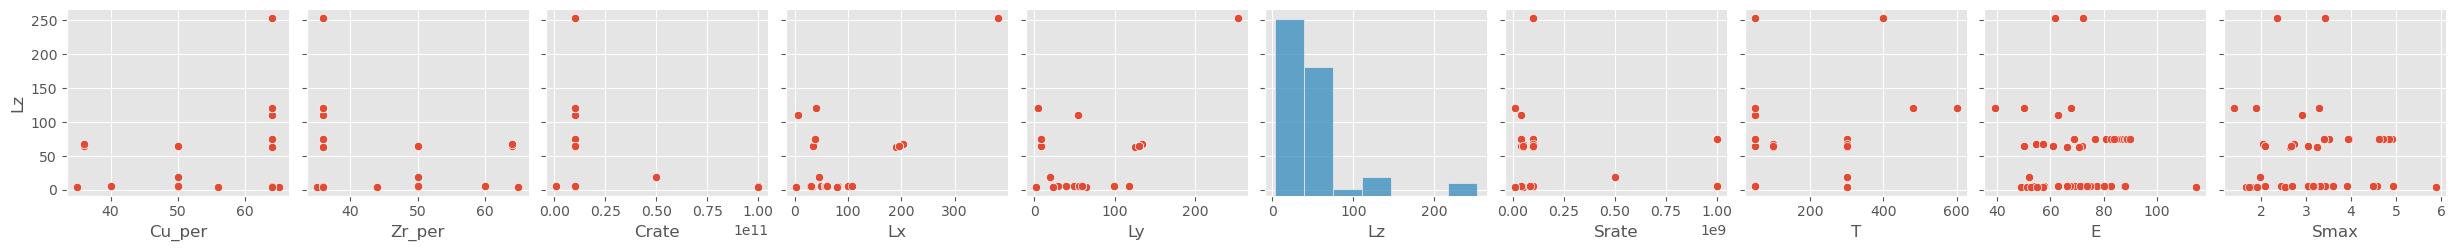

In [52]:
sns.pairplot(data=df_WO2, x_vars=['Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'], y_vars=['Lz'])


In [53]:
# Los graficos Lx y Ly son muy semejantes con respecto a Lz

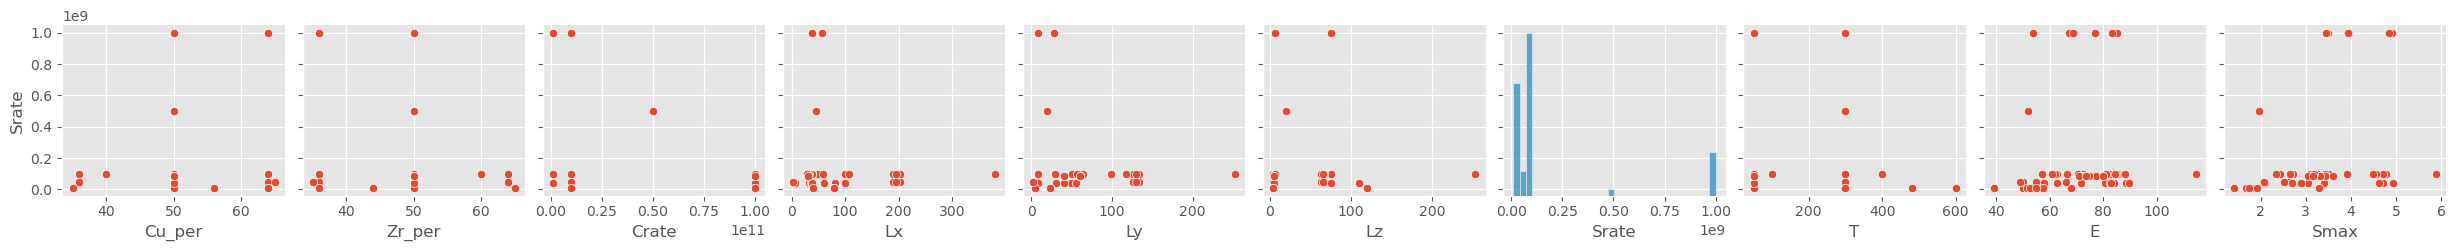

In [54]:
sns.pairplot(data=df_WO2, x_vars=['Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'], y_vars=['Srate'])


In [55]:
# Una aparente relacion raiz cuadratica con resecto a E y a Smax, pero con puntos fuera..

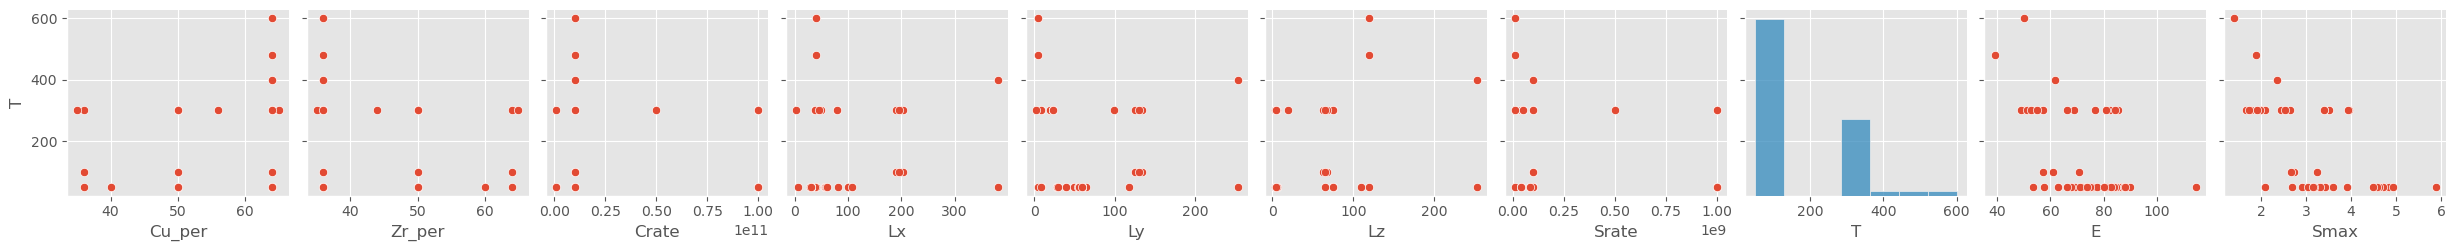

In [56]:
sns.pairplot(data=df_WO2, x_vars=['Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'], y_vars=['T'])


In [57]:
# Con respecto a T, en Smax se ve una tendencia  al abaja hasta el 3, posteriormente a eso se mantiene bajo.
# Además, en todos los graficos se ve una linea "media" en 150

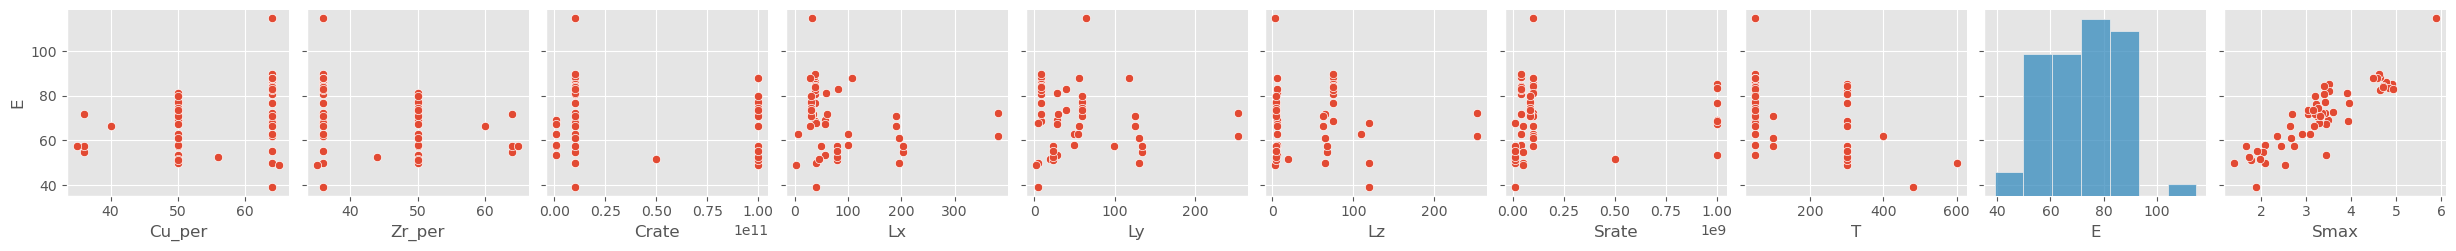

In [58]:
sns.pairplot(data=df_WO2, x_vars=['Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'], y_vars=['E'])


In [59]:
# Se ve una relacion lineal con Smax

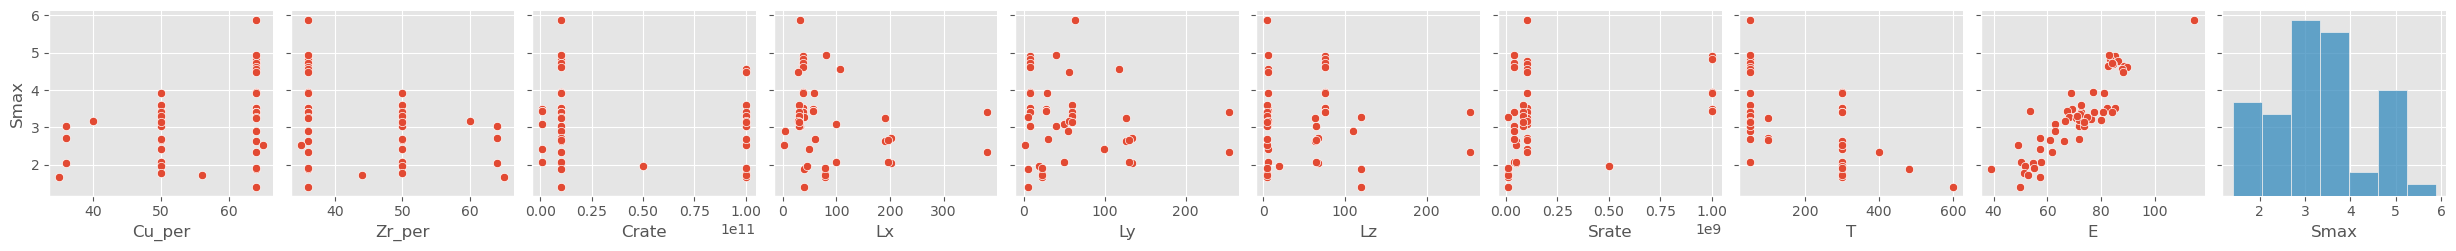

In [60]:
sns.pairplot(data=df_WO2, x_vars=['Cu_per', 'Zr_per', 'Crate', 'Lx', 'Ly', 'Lz', 'Srate', 'T', 'E', 'Smax'], y_vars=['Smax'])


In [61]:
# Se ve una relacion linea con E